In [ ]:
#!pip install polars

### Try on chunks to resolve memory error

In [1]:
import pandas as pd
import ast

In [2]:
# Load the CSV file in chunks to handle large data efficiently
chunksize = 2500000
chunks = pd.read_csv('./csv/nrw_hai_extracted.csv', chunksize=chunksize)

# Initialize an empty DataFrame to hold the processed data
result_df = pd.DataFrame()

In [3]:
# Function to calculate the centroid of the bounds
def calculate_centroid(bounds):
    lower_left_lon, lower_left_lat, upper_right_lon, upper_right_lat = bounds
    centroid_lon = (lower_left_lon + upper_right_lon) / 2
    centroid_lat = (lower_left_lat + upper_right_lat) / 2
    return centroid_lat, centroid_lon

In [4]:
# Process each chunk
count = 1
for chunk in chunks:
    print (f"Entering Chunk No. {count}")
    # Extract the required fields
    extracted_chunk = chunk[['AGG_DAY_PERIOD', 'BOUNDS', 'ACTIVITY_INDEX_TOTAL']].copy()
    
    # Parse the BOUNDS field and calculate the centroid for each bound
    extracted_chunk['BOUNDS'] = extracted_chunk['BOUNDS'].apply(lambda x: tuple(ast.literal_eval(x)))  # Safely parse the list from string and convert to tuple
    extracted_chunk[['CENTROID_LAT', 'CENTROID_LON']] = extracted_chunk['BOUNDS'].apply(lambda b: pd.Series(calculate_centroid(b)))
    
    # Group by AGG_DAY_PERIOD and BOUNDS and compute the mean ACTIVITY_INDEX_TOTAL
    grouped_chunk = extracted_chunk.groupby(['AGG_DAY_PERIOD', 'BOUNDS', 'CENTROID_LAT', 'CENTROID_LON'], as_index=False).agg({
        'ACTIVITY_INDEX_TOTAL': 'mean'
    }).rename(columns={'ACTIVITY_INDEX_TOTAL': 'MEAN_ACTIVITY_INDEX_TOTAL'})
    
    # Append the processed chunk to the result DataFrame
    result_df = pd.concat([result_df, grouped_chunk], ignore_index=True)
    print(f" Exiting Chunk No. {count} ")
    count = count+1

Entering Chunk No. 1


KeyboardInterrupt: 

In [6]:
# Save the resulting DataFrame to a new CSV file
result_df.to_csv('mean_activity_index_per_day_bounds.csv', index=False)

print("The CSV file has been created successfully.")

The CSV file has been created successfully.


In [10]:
result_df.nunique()

AGG_DAY_PERIOD                   347
BOUNDS                       3005863
CENTROID_LAT                    3072
CENTROID_LON                    2896
MEAN_ACTIVITY_INDEX_TOTAL     493526
dtype: int64

In [6]:
import pandas as pd

In [7]:
# Load the CSV data
data = pd.read_csv('./csv/Bounds_Hai.csv')

In [4]:
# Convert the 'AGG_DAY_PERIOD' field to datetime
data['AGG_DAY_PERIOD'] = pd.to_datetime(data['AGG_DAY_PERIOD'])

# Extract data from Feb 1, 2020, to April 30, 2020
data_feb_to_april = data[(data['AGG_DAY_PERIOD'] >= '2020-02-01') & (data['AGG_DAY_PERIOD'] <= '2020-04-30')]

# Extract data from May 1, 2020, to May 31, 2020
data_may = data[(data['AGG_DAY_PERIOD'] >= '2020-05-01') & (data['AGG_DAY_PERIOD'] <= '2020-05-31')]

In [5]:
# Save the extracted data to new CSV files
data_feb_to_april.to_csv('./csv/Feb_Apr_Hai.csv', index=False)
data_may.to_csv('./csv/May_Hai.csv', index=False)

# Print the number of records extracted for each range
print(f'Number of records from Feb 1, 2020 to April 30, 2020: {len(data_feb_to_april)}')
print(f'Number of records from May 1, 2020 to May 31, 2020: {len(data_may)}')

Number of records from Feb 1, 2020 to April 30, 2020: 12179223
Number of records from May 1, 2020 to May 31, 2020: 4760734


In [8]:
data_may_7 = data[(data['AGG_DAY_PERIOD'] >= '2020-05-01') & (data['AGG_DAY_PERIOD'] <= '2020-05-07')]
data_may_7.to_csv('./csv/May_7_Hai.csv', index=False)
print(f'Number of records from May 1, 2020 to May 7, 2020: {len(data_may_7)}')

Number of records from May 1, 2020 to May 7, 2020: 1004089


### Miscellaneous Testing

In [9]:
import rasterio
from matplotlib import pyplot

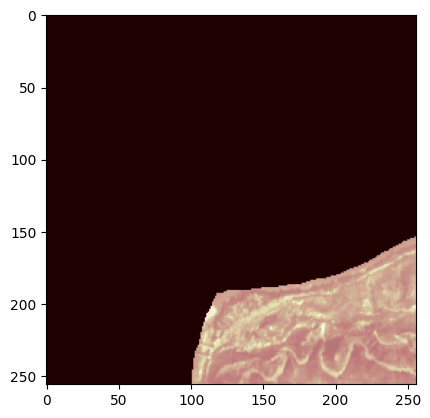

In [23]:
src = rasterio.open(r"E:\PROFESSION\NG\Research\Dhruba_Works\to janak\images\000000000005.tif")
pyplot.imshow(src.read(1), cmap='pink')
###<matplotlib.image.AxesImage object at 0x...>
pyplot.show()

In [32]:
import os
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import math

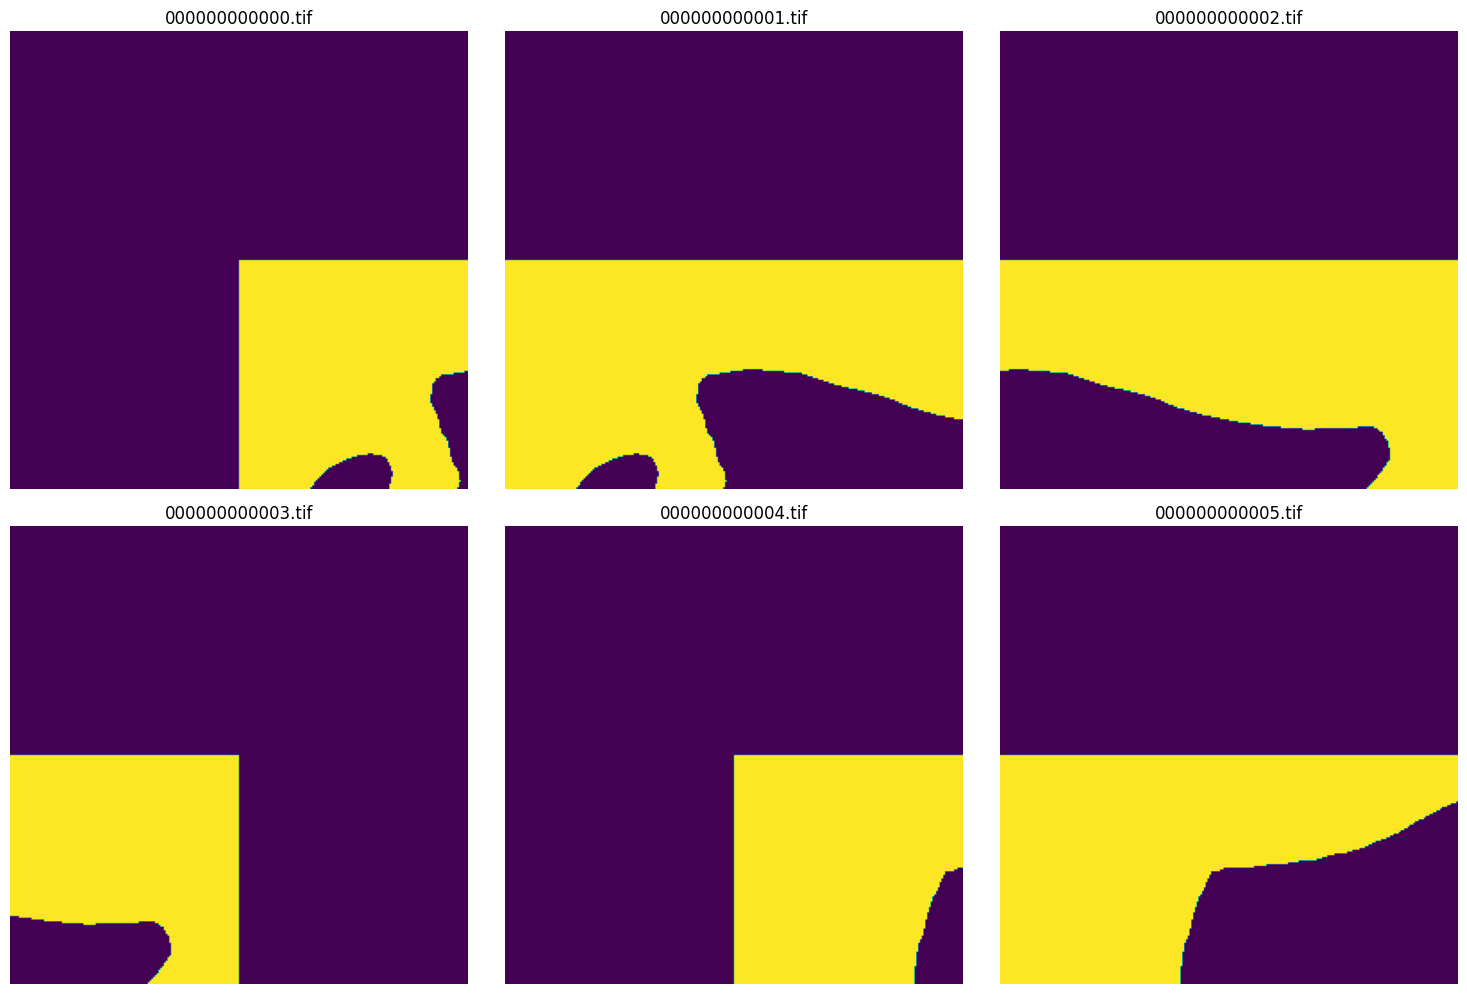

Finished plotting all 3-band TIFF files in a grid.


In [36]:
# Define the folder containing the TIFF files
folder_path = r'E:\PROFESSION\NG\Research\Dhruba_Works\to janak\labels'

# List all the TIFF files in the folder
tiff_files = [f for f in os.listdir(folder_path) if f.endswith('.tif') or f.endswith('.tiff')]

# Filter out files that do not have 3 bands
valid_tiff_files = []
for tiff_file in tiff_files:
    file_path = os.path.join(folder_path, tiff_file)
    with rasterio.open(file_path) as src:
        if src.count == 1:  # Check if the TIFF file has 3 bands
            valid_tiff_files.append(tiff_file)

# Calculate the grid size
num_files = len(valid_tiff_files)
grid_size = math.ceil(math.sqrt(num_files))

# Create the figure and axes for the grid of plots
fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each valid TIFF file
for i, tiff_file in enumerate(valid_tiff_files):
    file_path = os.path.join(folder_path, tiff_file)
    with rasterio.open(file_path) as src:
        show((src, 1), ax=axes[i])
        #show((src, 2), ax=axes[i])
        #show((src, 3), ax=axes[i])
        axes[i].set_title(tiff_file)
        axes[i].axis('off')  # Hide axes for better visualization

# Remove any empty subplots
for j in range(i + 1, grid_size * grid_size):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("Finished plotting all 3-band TIFF files in a grid.")
